# Non-invasive Sex Identification of T. granosa Using Machine Learning

## Setting up environment

In [8]:
## Data analysis and wrangling
import numpy as np
import pandas as pd
import random as rnd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import set_config
%matplotlib inline

## Preprocessing
from sklearn.preprocessing import MinMaxScaler

## Load and Preprocess Data

In [9]:
## from github
male_url = "https://raw.githubusercontent.com/Geez-l/litoX/main/SP_ML/datasets/male.csv"
male_litob = pd.read_csv(male_url)

male_litob.head(-1)

,Litob_id,Length,Width,Height,Rib count,Length (Hinge Line),Distance Umbos,Umbos Right,Umbos Left
0,110004,43.1,33.05,28.15,21,28.5,3.05,NaN,NaN
1,120004,43.1,33.05,28.15,21,28.5,3.05,NaN,NaN
2,130004,43.1,33.05,28.15,21,28.5,3.05,NaN,NaN
3,140004,43.1,33.05,28.15,21,28.5,3.05,NaN,NaN
4,150004,43.1,33.05,28.15,21,28.5,3.05,NaN,NaN
...,...,...,...,...,...,...,...,...,...
859,110261,47.2,31.65,32.05,21,33.7,3.65,18.05,15.65
860,120261,47.2,31.65,32.05,21,33.7,3.65,18.05,15.65
861,130261,47.2,31.65,32.05,21,33.7,3.65,18.05,15.65
862,140261,47.2,31.65,32.05,21,33.7,3.65,18.05,15.65


## MALE DATASET PREPROCESSING

Dropping unused columns

In [10]:
male_litob = male_litob.drop(columns=['Umbos Right', 'Umbos Left'])
male_litob.head(-1)

,Litob_id,Length,Width,Height,Rib count,Length (Hinge Line),Distance Umbos
0,110004,43.1,33.05,28.15,21,28.5,3.05
1,120004,43.1,33.05,28.15,21,28.5,3.05
2,130004,43.1,33.05,28.15,21,28.5,3.05
3,140004,43.1,33.05,28.15,21,28.5,3.05
4,150004,43.1,33.05,28.15,21,28.5,3.05
...,...,...,...,...,...,...,...
859,110261,47.2,31.65,32.05,21,33.7,3.65
860,120261,47.2,31.65,32.05,21,33.7,3.65
861,130261,47.2,31.65,32.05,21,33.7,3.65
862,140261,47.2,31.65,32.05,21,33.7,3.65


dropping nan values

In [11]:
## drops nan
male_litob = male_litob.dropna()
male_litob

,Litob_id,Length,Width,Height,Rib count,Length (Hinge Line),Distance Umbos
0,110004,43.1,33.05,28.15,21,28.5,3.05
1,120004,43.1,33.05,28.15,21,28.5,3.05
2,130004,43.1,33.05,28.15,21,28.5,3.05
3,140004,43.1,33.05,28.15,21,28.5,3.05
4,150004,43.1,33.05,28.15,21,28.5,3.05
...,...,...,...,...,...,...,...
860,120261,47.2,31.65,32.05,21,33.7,3.65
861,130261,47.2,31.65,32.05,21,33.7,3.65
862,140261,47.2,31.65,32.05,21,33.7,3.65
863,150261,47.2,31.65,32.05,21,33.7,3.65


Create other features a. LW_ratio and b. LH_ratio

In [12]:
## feature engineering
male_litob['LW_ratio']= male_litob['Length'] / male_litob['Width']
male_litob['LH_ratio'] = male_litob['Length'] / male_litob['Height']
male_litob['WH_ratio'] = male_litob['Width'] / male_litob['Height']
# male_litob['DU_ratio'] = male_litob['Distance Umbos'] / male_litob['Height']
male_litob['UL_ratio'] = male_litob['Distance Umbos'] / male_litob['Length']


male_litob

,Litob_id,Length,Width,Height,Rib count,Length (Hinge Line),Distance Umbos,LW_ratio,LH_ratio,WH_ratio,UL_ratio
0,110004,43.1,33.05,28.15,21,28.5,3.05,1.304085,1.531083,1.174067,0.070766
1,120004,43.1,33.05,28.15,21,28.5,3.05,1.304085,1.531083,1.174067,0.070766
2,130004,43.1,33.05,28.15,21,28.5,3.05,1.304085,1.531083,1.174067,0.070766
3,140004,43.1,33.05,28.15,21,28.5,3.05,1.304085,1.531083,1.174067,0.070766
4,150004,43.1,33.05,28.15,21,28.5,3.05,1.304085,1.531083,1.174067,0.070766
...,...,...,...,...,...,...,...,...,...,...,...
860,120261,47.2,31.65,32.05,21,33.7,3.65,1.491311,1.472699,0.987520,0.077331
861,130261,47.2,31.65,32.05,21,33.7,3.65,1.491311,1.472699,0.987520,0.077331
862,140261,47.2,31.65,32.05,21,33.7,3.65,1.491311,1.472699,0.987520,0.077331
863,150261,47.2,31.65,32.05,21,33.7,3.65,1.491311,1.472699,0.987520,0.077331


Preprocessing to keep only the unique instances

In [13]:

## extracts last 3 digits since its unique in dataset

male_litob["Base_ID"] = male_litob["Litob_id"] % 1000

## keeps only the first occurrence of each Base_ID
male_litob_unique = male_litob.drop_duplicates(subset="Base_ID", keep="first").drop(columns=["Base_ID"])

# keep only rows where Litob_id starts with 110XXX
male_litob_unique = male_litob_unique[male_litob_unique["Litob_id"] // 1000 == 110]
male_litob_unique.drop(columns=['Unnamed:0'], inplace=True, errors='ignore')

male_litob_unique.head(-1)

,Litob_id,Length,Width,Height,Rib count,Length (Hinge Line),Distance Umbos,LW_ratio,LH_ratio,WH_ratio,UL_ratio
0,110004,43.10,33.05,28.15,21,28.50,3.05,1.304085,1.531083,1.174067,0.070766
6,110005,41.10,31.05,27.60,20,23.05,3.35,1.323671,1.489130,1.125000,0.081509
12,110006,43.20,33.45,29.35,20,29.35,3.30,1.291480,1.471891,1.139693,0.076389
18,110007,41.50,32.55,27.70,20,24.10,3.70,1.274962,1.498195,1.175090,0.089157
24,110008,42.20,33.05,27.70,21,24.05,2.05,1.276853,1.523466,1.193141,0.048578
...,...,...,...,...,...,...,...,...,...,...,...
829,110256,50.30,37.05,37.05,20,32.20,4.30,1.357625,1.357625,1.000000,0.085487
835,110257,57.30,42.75,38.45,20,38.30,7.40,1.340351,1.490247,1.111834,0.129145
841,110258,47.15,36.40,34.05,19,32.25,4.05,1.295330,1.384728,1.069016,0.085896
847,110259,43.05,31.50,28.05,19,28.60,3.65,1.366667,1.534759,1.122995,0.084785


Checking and debugging purposes

In [14]:
male_litob_unique.columns

Index(['Litob_id', 'Length', 'Width', 'Height', 'Rib count',
       'Length (Hinge Line)', 'Distance Umbos', 'LW_ratio', 'LH_ratio',
       'WH_ratio', 'UL_ratio'],
      dtype='object')

In [15]:
# from google.colab import files
# male_litob_unique.to_csv('male_litob_unique.csv', encoding = 'utf-8-sig')
# files.download('male_litob_unique.csv')

## FEMALE DATASET PREPROCESSING

In [16]:
## from github
female_url = "https://raw.githubusercontent.com/Geez-l/litoX/main/SP_ML/datasets/female.csv"
female_litob = pd.read_csv(female_url)

female_litob.head(-1)

,Litob_id,Length,Width,Height,Rib count,Length (Hinge Line),Distance Umbos,Umbos Right,Umbos Left
0,10001,48.05,37.60,32.15,20,33.55,4.1,NaN,NaN
1,20001,48.05,37.60,32.15,20,33.55,4.1,NaN,NaN
2,30001,48.05,37.60,32.15,20,33.55,4.1,NaN,NaN
3,40001,48.05,37.60,32.15,20,33.55,4.1,NaN,NaN
4,50001,48.05,37.60,32.15,20,33.55,4.1,NaN,NaN
...,...,...,...,...,...,...,...,...,...
755,10246,50.05,36.55,35.05,20,33.70,4.6,19.3,18.3
756,20246,50.05,36.55,35.05,20,33.70,4.6,19.3,18.3
757,30246,50.05,36.55,35.05,20,33.70,4.6,19.3,18.3
758,40246,50.05,36.55,35.05,20,33.70,4.6,19.3,18.3


dropping unused columns

In [17]:
## drops umbos right and left
female_litob = female_litob.drop(columns=['Umbos Right', 'Umbos Left'])
female_litob.head(-1)

,Litob_id,Length,Width,Height,Rib count,Length (Hinge Line),Distance Umbos
0,10001,48.05,37.60,32.15,20,33.55,4.1
1,20001,48.05,37.60,32.15,20,33.55,4.1
2,30001,48.05,37.60,32.15,20,33.55,4.1
3,40001,48.05,37.60,32.15,20,33.55,4.1
4,50001,48.05,37.60,32.15,20,33.55,4.1
...,...,...,...,...,...,...,...
755,10246,50.05,36.55,35.05,20,33.70,4.6
756,20246,50.05,36.55,35.05,20,33.70,4.6
757,30246,50.05,36.55,35.05,20,33.70,4.6
758,40246,50.05,36.55,35.05,20,33.70,4.6


dropping nan values

In [18]:
## drops NaN values
female_litob = female_litob.dropna()
female_litob

,Litob_id,Length,Width,Height,Rib count,Length (Hinge Line),Distance Umbos
0,10001,48.05,37.60,32.15,20,33.55,4.1
1,20001,48.05,37.60,32.15,20,33.55,4.1
2,30001,48.05,37.60,32.15,20,33.55,4.1
3,40001,48.05,37.60,32.15,20,33.55,4.1
4,50001,48.05,37.60,32.15,20,33.55,4.1
...,...,...,...,...,...,...,...
756,20246,50.05,36.55,35.05,20,33.70,4.6
757,30246,50.05,36.55,35.05,20,33.70,4.6
758,40246,50.05,36.55,35.05,20,33.70,4.6
759,50246,50.05,36.55,35.05,20,33.70,4.6


adding features a. LW_ratio and LH_ratio

In [19]:
## calculating ratios

female_litob['LW_ratio']= female_litob['Length'] / female_litob['Width']
female_litob['LH_ratio'] = female_litob['Length'] / female_litob['Height']
female_litob['WH_ratio'] = female_litob['Width'] / female_litob['Height']
# female_litob['DU_ratio'] = female_litob['Distance Umbos'] / female_litob['Height']
female_litob['UL_ratio'] = female_litob['Distance Umbos'] / female_litob['Length']


female_litob

,Litob_id,Length,Width,Height,Rib count,Length (Hinge Line),Distance Umbos,LW_ratio,LH_ratio,WH_ratio,UL_ratio
0,10001,48.05,37.60,32.15,20,33.55,4.1,1.277926,1.494557,1.169518,0.085328
1,20001,48.05,37.60,32.15,20,33.55,4.1,1.277926,1.494557,1.169518,0.085328
2,30001,48.05,37.60,32.15,20,33.55,4.1,1.277926,1.494557,1.169518,0.085328
3,40001,48.05,37.60,32.15,20,33.55,4.1,1.277926,1.494557,1.169518,0.085328
4,50001,48.05,37.60,32.15,20,33.55,4.1,1.277926,1.494557,1.169518,0.085328
...,...,...,...,...,...,...,...,...,...,...,...
756,20246,50.05,36.55,35.05,20,33.70,4.6,1.369357,1.427960,1.042796,0.091908
757,30246,50.05,36.55,35.05,20,33.70,4.6,1.369357,1.427960,1.042796,0.091908
758,40246,50.05,36.55,35.05,20,33.70,4.6,1.369357,1.427960,1.042796,0.091908
759,50246,50.05,36.55,35.05,20,33.70,4.6,1.369357,1.427960,1.042796,0.091908


keeping unique instances in female dataset

In [20]:

## extracts last 3 digits since its unique in dataset
female_litob["Base_ID"] = female_litob["Litob_id"] % 1000

## keeps only the first occurrence of each Base_ID
female_litob_unique = female_litob.drop_duplicates(subset="Base_ID", keep="first").drop(columns=["Base_ID"])

# keep only rows where Litob_id starts with 01XXX
female_litob_unique = female_litob_unique[female_litob_unique["Litob_id"].astype(str).str.startswith("1")]
female_litob_unique.drop(columns=['Unnamed:0'], inplace=True, errors='ignore')

female_litob_unique.head()

,Litob_id,Length,Width,Height,Rib count,Length (Hinge Line),Distance Umbos,LW_ratio,LH_ratio,WH_ratio,UL_ratio
0,10001,48.05,37.60,32.15,20,33.55,4.10,1.277926,1.494557,1.169518,0.085328
6,10002,47.40,32.50,32.25,20,33.10,3.05,1.458462,1.469767,1.007752,0.064346
12,10003,43.30,34.10,31.25,21,32.05,4.50,1.269795,1.385600,1.091200,0.103926
18,10075,50.05,35.05,32.05,21,30.05,4.10,1.427960,1.561622,1.093604,0.081918
24,10076,40.25,33.55,32.40,20,29.35,3.40,1.199702,1.242284,1.035494,0.084472


checking and debugging purposes

In [21]:
female_litob_unique.columns

Index(['Litob_id', 'Length', 'Width', 'Height', 'Rib count',
       'Length (Hinge Line)', 'Distance Umbos', 'LW_ratio', 'LH_ratio',
       'WH_ratio', 'UL_ratio'],
      dtype='object')

In [22]:
#from google.colab import files
#female_litob_unique.to_csv('female_litob_unique.csv', encoding = 'utf-8-sig')
#files.download('female_litob_unique.csv')

## Assigning labels to the male and female where female = 0 and male = 1

In [23]:
## labels assigned
female_litob_unique['Label'] = 0
male_litob_unique['Label'] = 1

In [24]:
## combining male and female datasets
litob_combined = pd.concat([female_litob_unique, male_litob_unique], ignore_index=True)
litob_combined

,Litob_id,Length,Width,Height,Rib count,Length (Hinge Line),Distance Umbos,LW_ratio,LH_ratio,WH_ratio,UL_ratio,Label
0,10001,48.05,37.60,32.15,20,33.55,4.10,1.277926,1.494557,1.169518,0.085328,0
1,10002,47.40,32.50,32.25,20,33.10,3.05,1.458462,1.469767,1.007752,0.064346,0
2,10003,43.30,34.10,31.25,21,32.05,4.50,1.269795,1.385600,1.091200,0.103926,0
3,10075,50.05,35.05,32.05,21,30.05,4.10,1.427960,1.561622,1.093604,0.081918,0
4,10076,40.25,33.55,32.40,20,29.35,3.40,1.199702,1.242284,1.035494,0.084472,0
...,...,...,...,...,...,...,...,...,...,...,...,...
256,110257,57.30,42.75,38.45,20,38.30,7.40,1.340351,1.490247,1.111834,0.129145,1
257,110258,47.15,36.40,34.05,19,32.25,4.05,1.295330,1.384728,1.069016,0.085896,1
258,110259,43.05,31.50,28.05,19,28.60,3.65,1.366667,1.534759,1.122995,0.084785,1
259,110260,52.40,39.05,36.05,21,34.20,4.05,1.341869,1.453537,1.083218,0.077290,1


remove the litob id

In [25]:
##  remove Litob_id column

if 'Litob_id' in litob_combined.columns:
    litob_combined = litob_combined.drop('Litob_id', axis=1)

litob_combined

,Length,Width,Height,Rib count,Length (Hinge Line),Distance Umbos,LW_ratio,LH_ratio,WH_ratio,UL_ratio,Label
0,48.05,37.60,32.15,20,33.55,4.10,1.277926,1.494557,1.169518,0.085328,0
1,47.40,32.50,32.25,20,33.10,3.05,1.458462,1.469767,1.007752,0.064346,0
2,43.30,34.10,31.25,21,32.05,4.50,1.269795,1.385600,1.091200,0.103926,0
3,50.05,35.05,32.05,21,30.05,4.10,1.427960,1.561622,1.093604,0.081918,0
4,40.25,33.55,32.40,20,29.35,3.40,1.199702,1.242284,1.035494,0.084472,0
...,...,...,...,...,...,...,...,...,...,...,...
256,57.30,42.75,38.45,20,38.30,7.40,1.340351,1.490247,1.111834,0.129145,1
257,47.15,36.40,34.05,19,32.25,4.05,1.295330,1.384728,1.069016,0.085896,1
258,43.05,31.50,28.05,19,28.60,3.65,1.366667,1.534759,1.122995,0.084785,1
259,52.40,39.05,36.05,21,34.20,4.05,1.341869,1.453537,1.083218,0.077290,1


In [26]:
from google.colab import files
litob_combined.to_csv('litob_combined.csv', encoding = 'utf-8-sig')
files.download('litob_combined.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Data Exploration

features assigned


In [279]:
## assigning features
features = ['Length', 'Width', 'Height', 'Rib count', 'Length (Hinge Line)', 'Distance Umbos', 'LW_ratio', 'LH_ratio', 'DU_ratio', 'UL_ratio']
litob_combined[features].head()

,Length,Width,Height,Rib count,Length (Hinge Line),Distance Umbos,LW_ratio,LH_ratio,DU_ratio,UL_ratio
0,48.05,37.60,32.15,20,33.55,4.10,1.277926,1.494557,0.127527,0.085328
1,47.40,32.50,32.25,20,33.10,3.05,1.458462,1.469767,0.094574,0.064346
2,43.30,34.10,31.25,21,32.05,4.50,1.269795,1.385600,0.144000,0.103926
3,50.05,35.05,32.05,21,30.05,4.10,1.427960,1.561622,0.127925,0.081918
4,40.25,33.55,32.40,20,29.35,3.40,1.199702,1.242284,0.104938,0.084472


statistical tests

Displaying the distribution, test used and the implication if there is significant difference or not

In [280]:
from scipy.stats import shapiro, mannwhitneyu

## alpha level
alpha = 0.05

## features iterated
for feature in features:

    ## normality test
    shapiro_test = shapiro(litob_combined[feature])

    ## display Shapiro-Wilk test results
    print(f"Feature: {feature}")
    print(f"Shapiro-Wilk Test Statistic: {shapiro_test.statistic}")
    print(f"P-value: {shapiro_test.pvalue:.3f}")  # Display with 10 decimal places

    ## interpret the normality test
    if shapiro_test.pvalue > alpha:
        print("Data is normally distributed. Proceeding with independent sample T-test.")

        ## normally distributed, perform an independent sample T-test
        male_data = litob_combined[litob_combined['Label'] == 1][feature]
        female_data = litob_combined[litob_combined['Label'] == 0][feature]

        ## normally distributed = t-test
        print(f"T-test for {feature} not implemented in this code snippet.")
    else:
        ## not normally distributed = mann whitney
        print("Data is not normally distributed. Proceeding with Mann-Whitney U test.")
        male_data = litob_combined[litob_combined['Label'] == 1][feature]
        female_data = litob_combined[litob_combined['Label'] == 0][feature]

        # mann-Whitney U test
        statistic, p_value = mannwhitneyu(male_data, female_data, alternative='two-sided')

        # result MUT
        print(f"Mann-Whitney U Test Statistic: {statistic}")
        print(f"P-value: {p_value:.3f}")

        # interpreting result
        if p_value > alpha:
            print(f"There is no significant difference between the {feature} of male and female litob.\n")
        else:
            print(f"There is a significant difference between the {feature} of male and female litob.\n")


Feature: Length
Shapiro-Wilk Test Statistic: 0.20950950337104546
P-value: 0.000
Data is not normally distributed. Proceeding with Mann-Whitney U test.
Mann-Whitney U Test Statistic: 8218.5
P-value: 0.735
There is no significant difference between the Length of male and female litob.

Feature: Width
Shapiro-Wilk Test Statistic: 0.9638218137983307
P-value: 0.000
Data is not normally distributed. Proceeding with Mann-Whitney U test.
Mann-Whitney U Test Statistic: 8677.0
P-value: 0.677
There is no significant difference between the Width of male and female litob.

Feature: Height
Shapiro-Wilk Test Statistic: 0.9494747031036292
P-value: 0.000
Data is not normally distributed. Proceeding with Mann-Whitney U test.
Mann-Whitney U Test Statistic: 7834.5
P-value: 0.331
There is no significant difference between the Height of male and female litob.

Feature: Rib count
Shapiro-Wilk Test Statistic: 0.8758793475758861
P-value: 0.000
Data is not normally distributed. Proceeding with Mann-Whitney U te

dataframe version

In [281]:
## store results
results = []

## iterate through features
for feature in features:

    # normality test
    shapiro_test = shapiro(litob_combined[feature])
    distribution = "Normal" if shapiro_test.pvalue > alpha else "Non-normal"

    # Perform appropriate test
    male_data = litob_combined[litob_combined['Label'] == 1][feature]
    female_data = litob_combined[litob_combined['Label'] == 0][feature]

    if distribution == "Normal":
        test_used = "T-test (not implemented)"
        p_value = None
        implication = "T-test not performed"
    else:
        test_used = "Mann-Whitney U test"
        statistic, p_value = mannwhitneyu(male_data, female_data, alternative='two-sided')
        implication = "Significant difference" if p_value <= alpha else "No significant difference"

    # append to results list
    results.append([feature, distribution, test_used, p_value, implication])

# result to df
results_df = pd.DataFrame(results, columns=["Variable Name", "Distribution", "Test used", "p-value", "Implication"])
results_df

,Variable Name,Distribution,Test used,p-value,Implication
0,Length,Non-normal,Mann-Whitney U test,0.735343,No significant difference
1,Width,Non-normal,Mann-Whitney U test,0.677143,No significant difference
2,Height,Non-normal,Mann-Whitney U test,0.331437,No significant difference
3,Rib count,Non-normal,Mann-Whitney U test,0.185927,No significant difference
4,Length (Hinge Line),Non-normal,Mann-Whitney U test,0.412008,No significant difference
5,Distance Umbos,Non-normal,Mann-Whitney U test,0.049614,Significant difference
6,LW_ratio,Non-normal,Mann-Whitney U test,0.005155,Significant difference
7,LH_ratio,Non-normal,Mann-Whitney U test,0.418195,No significant difference
8,DU_ratio,Non-normal,Mann-Whitney U test,0.045591,Significant difference
9,UL_ratio,Non-normal,Mann-Whitney U test,0.023587,Significant difference


## Scaling the values

In [282]:
from sklearn.preprocessing import MinMaxScaler

##  columns to scale excluding the label
cols_to_scale = ['Length', 'Width', 'Height', 'Rib count', 'Length (Hinge Line)', 'Distance Umbos', 'LW_ratio', 'LH_ratio']

scaler = MinMaxScaler()

# fit and transform the selected columns
litob_combined[cols_to_scale] = scaler.fit_transform(litob_combined[cols_to_scale])

litob_combined

,Length,Width,Height,Rib count,Length (Hinge Line),Distance Umbos,LW_ratio,LH_ratio,WH_ratio,DU_ratio,UL_ratio,Label
0,0.026072,0.429735,0.339114,0.6,0.492701,0.089706,0.012637,0.025299,1.169518,0.127527,0.085328,0
1,0.024378,0.221996,0.342967,0.6,0.476277,0.058824,0.026616,0.023227,1.007752,0.094574,0.064346,0
2,0.013688,0.287169,0.304432,0.8,0.437956,0.101471,0.012008,0.016191,1.091200,0.144000,0.103926,0
3,0.031287,0.325866,0.335260,0.8,0.364964,0.089706,0.024254,0.030905,1.093604,0.127925,0.081918,0
4,0.005736,0.264766,0.348748,0.6,0.339416,0.069118,0.006581,0.004210,1.035494,0.104938,0.084472,0
...,...,...,...,...,...,...,...,...,...,...,...,...
256,0.050189,0.639511,0.581888,0.6,0.666058,0.186765,0.017471,0.024939,1.111834,0.192458,0.129145,1
257,0.023726,0.380855,0.412331,0.4,0.445255,0.088235,0.013985,0.016118,1.069016,0.118943,0.085896,1
258,0.013036,0.181263,0.181118,0.4,0.312044,0.076471,0.019508,0.028660,1.122995,0.130125,0.084785,1
259,0.037414,0.488798,0.489403,0.8,0.516423,0.088235,0.017588,0.021870,1.083218,0.112344,0.077290,1


## Downloading the final dataset

In [283]:
from google.colab import files
litob_combined.to_csv('litob_combined.csv', index=False)
files.download('litob_combined.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Dataset Inspection and Visualizations

In [284]:
## checking columns
litob_combined.columns

Index(['Length', 'Width', 'Height', 'Rib count', 'Length (Hinge Line)',
       'Distance Umbos', 'LW_ratio', 'LH_ratio', 'WH_ratio', 'DU_ratio',
       'UL_ratio', 'Label'],
      dtype='object')

## histogram

array([[<Axes: title={'center': 'Length'}>,
        <Axes: title={'center': 'Width'}>,
        <Axes: title={'center': 'Height'}>],
       [<Axes: title={'center': 'Rib count'}>,
        <Axes: title={'center': 'Length (Hinge Line)'}>,
        <Axes: title={'center': 'Distance Umbos'}>],
       [<Axes: title={'center': 'LW_ratio'}>,
        <Axes: title={'center': 'LH_ratio'}>,
        <Axes: title={'center': 'WH_ratio'}>],
       [<Axes: title={'center': 'DU_ratio'}>,
        <Axes: title={'center': 'UL_ratio'}>, <Axes: >]], dtype=object)

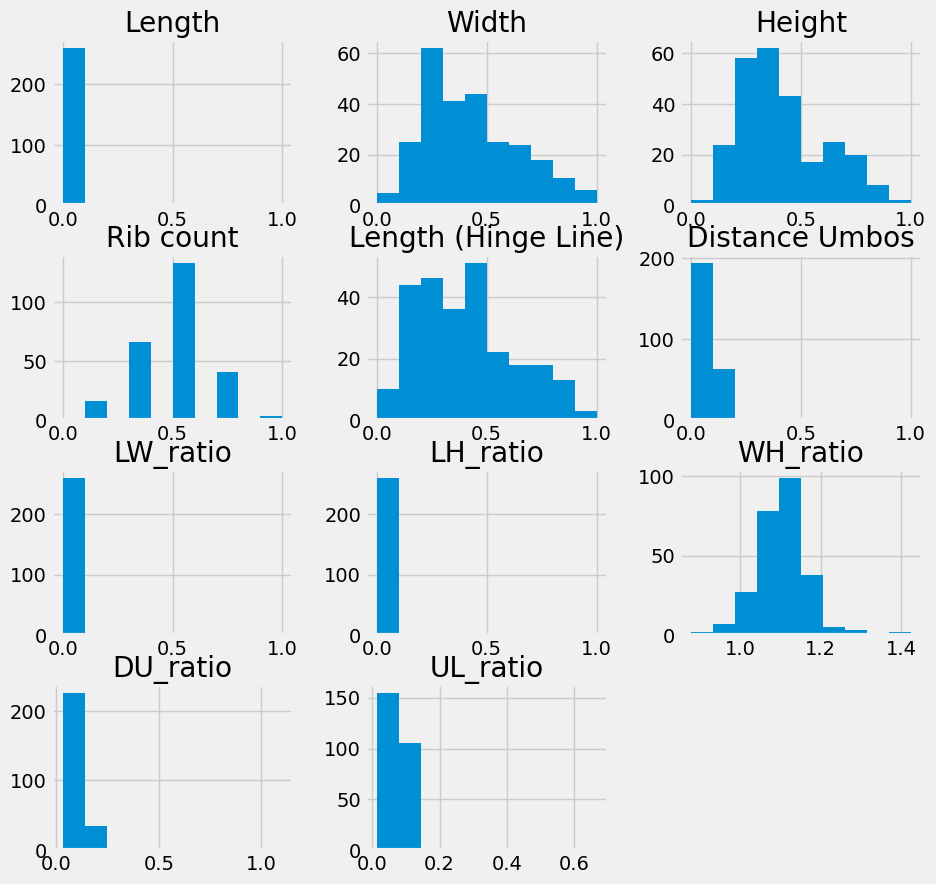

In [285]:
litob_combined_explore = litob_combined.drop(columns=['Label'], errors = 'ignore')
litob_combined_explore.hist(figsize = (10, 10))

exploring the meean, std and etc


In [286]:
litob_combined_explore.describe()

,Length,Width,Height,Rib count,Length (Hinge Line),Distance Umbos,LW_ratio,LH_ratio,WH_ratio,DU_ratio,UL_ratio
count,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000
mean,0.033280,0.429823,0.414567,0.560153,0.402461,0.079108,0.019215,0.025444,1.105204,0.108325,0.074058
std,0.062798,0.216930,0.194770,0.168997,0.219942,0.071303,0.061175,0.060990,0.065314,0.070270,0.043596
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.878151,0.030837,0.013401
25%,0.014079,0.250509,0.277457,0.400000,0.226277,0.044118,0.012311,0.017366,1.071344,0.081331,0.055749
50%,0.026985,0.386965,0.373796,0.600000,0.364964,0.070588,0.015033,0.021976,1.110482,0.106280,0.071809
75%,0.041716,0.580448,0.527938,0.600000,0.547445,0.101471,0.017924,0.026381,1.140893,0.123128,0.085328
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.423237,1.103937,0.666350


In [287]:
litob_combined.Label.value_counts()

,count
Label,
1,144
0,117


## Checking for class imbalance

In [288]:

class_counts = litob_combined['Label'].value_counts()

## percentage of each class
class_percentages = class_counts / len(litob_combined) * 100
class_percentages


,count
Label,
1,55.172414
0,44.827586


## Samples count visualizations

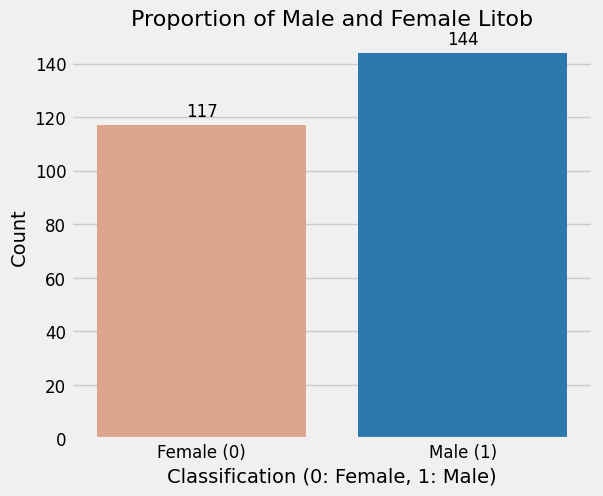

Proportions of Classes:


,count
Label,
1,0.551724
0,0.448276


In [289]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('fivethirtyeight')
plt.figure(figsize=(6, 5))

colors = {0: "#e9a080", 1: "#187cc1"}

ax = sns.countplot(x='Label', data=litob_combined, hue='Label', palette=colors, legend=False)
plt.xlabel('Classification (0: Female, 1: Male)', fontsize=14)
plt.ylabel('Count', fontsize=14)

plt.title('Proportion of Male and Female Litob', fontsize=16)
plt.xticks(ticks=[0, 1], labels=['Female (0)', 'Male (1)'], fontsize=12)
plt.yticks(fontsize=12)

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),  # Converted to int
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=12)

plt.show()

counts = litob_combined.Label.value_counts()
proportions = counts / counts.sum()
print('Proportions of Classes:')
proportions

## Checking correlation

In [290]:
litob_features = litob_combined.columns.drop(['Label'])
x = litob_combined[litob_features]
y = litob_combined['Label']

variable_corr = pd.concat([x, y], axis=1)
variable_corr

,Length,Width,Height,Rib count,Length (Hinge Line),Distance Umbos,LW_ratio,LH_ratio,WH_ratio,DU_ratio,UL_ratio,Label
0,0.026072,0.429735,0.339114,0.6,0.492701,0.089706,0.012637,0.025299,1.169518,0.127527,0.085328,0
1,0.024378,0.221996,0.342967,0.6,0.476277,0.058824,0.026616,0.023227,1.007752,0.094574,0.064346,0
2,0.013688,0.287169,0.304432,0.8,0.437956,0.101471,0.012008,0.016191,1.091200,0.144000,0.103926,0
3,0.031287,0.325866,0.335260,0.8,0.364964,0.089706,0.024254,0.030905,1.093604,0.127925,0.081918,0
4,0.005736,0.264766,0.348748,0.6,0.339416,0.069118,0.006581,0.004210,1.035494,0.104938,0.084472,0
...,...,...,...,...,...,...,...,...,...,...,...,...
256,0.050189,0.639511,0.581888,0.6,0.666058,0.186765,0.017471,0.024939,1.111834,0.192458,0.129145,1
257,0.023726,0.380855,0.412331,0.4,0.445255,0.088235,0.013985,0.016118,1.069016,0.118943,0.085896,1
258,0.013036,0.181263,0.181118,0.4,0.312044,0.076471,0.019508,0.028660,1.122995,0.130125,0.084785,1
259,0.037414,0.488798,0.489403,0.8,0.516423,0.088235,0.017588,0.021870,1.083218,0.112344,0.077290,1


In [291]:
## correlation
correlation_matrix = variable_corr.corr()


label_correlations = correlation_matrix['Label'].drop('Label')
sorted_correlations = label_correlations.abs().sort_values(ascending=False)
sorted_correlations


,Label
WH_ratio,0.203527
UL_ratio,0.120345
Distance Umbos,0.111472
DU_ratio,0.105862
Rib count,0.088515
LH_ratio,0.060983
Height,0.056680
Length (Hinge Line),0.049301
Length,0.040252
LW_ratio,0.038815


check for multicollinearity

In [292]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Create a new DataFrame with the selected features
X = female_litob[features]

# Add a constant column to include the intercept in the VIF calculation
X_const = add_constant(X)

# Calculate VIF for each feature
vif = pd.DataFrame()
vif['Feature'] = X_const.columns
vif['VIF'] = [variance_inflation_factor(X_const.values, i) for i in range(X_const.shape[1])]

# Display VIF values
print(vif)


                Feature           VIF
0                 const  30887.604744
1                Length    803.026179
2                 Width    573.612546
3                Height    621.315182
4             Rib count      1.052194
5   Length (Hinge Line)      6.103288
6        Distance Umbos    427.834594
7              LW_ratio     71.148251
8              LH_ratio     80.755807
9              DU_ratio    569.709008
10             UL_ratio    515.525743


## Correlation map

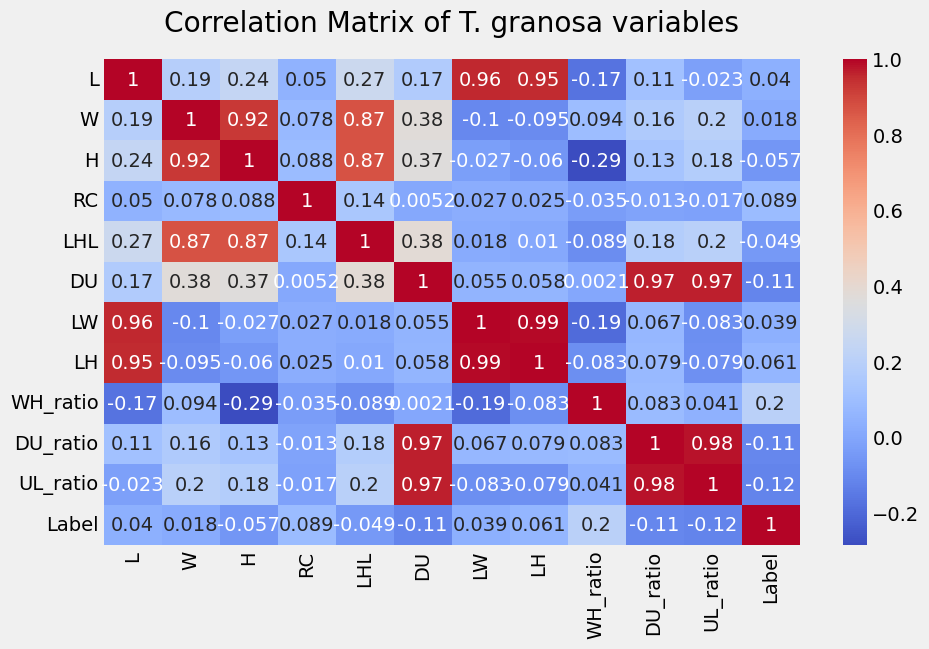

In [293]:
## col names and codenames
codenames = {
    'Length': 'L',
    'Width': 'W',
    'Height': 'H',
    'Rib count': 'RC',
    'Length (Hinge Line)': 'LHL',
    'Distance Umbos': 'DU',
    'LW_ratio': 'LW',
    'LH_ratio': 'LH',
    'Label': 'Label'
}


variable_corr = variable_corr.rename(columns=codenames)

## display heatmap
corr = variable_corr.corr()
plt.figure(figsize=(10, 6))
plt.title('Correlation Matrix of T. granosa variables', pad=20)
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

## Data grouped based on label

In [294]:
## mean and sd by sex
grouped_data = litob_combined.groupby('Label')[features].agg(['mean', 'std'])
grouped_data

Length               Width              Height           Rib count  \
           mean       std      mean       std      mean       std      mean   
Label                                                                         
0      0.030481  0.019393  0.425401  0.227289  0.426791  0.198510  0.543590   
1      0.035554  0.082786  0.433415  0.208868  0.404635  0.191795  0.573611   

                Length (Hinge Line)           Distance Umbos            \
            std                mean       std           mean       std   
Label                                                                    
0      0.167838            0.414468  0.223416       0.087908  0.094059   
1      0.169320            0.392706  0.217370       0.071957  0.044185   

       LW_ratio            LH_ratio            DU_ratio            UL_ratio  \
           mean       std      mean       std      mean       std      mean   
Label                                                                         
0      0.016585  0.005951  0.021326  0.006774  0.116562  0.096922  0.079868   
1      0.021351  0.082252  0.028790  0.081859  0.101632  0.035457  0.069338   

                 
            std  
Label            
0      0.058580  
1      0.024939

ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (10,) and arg 1 with shape (8,).

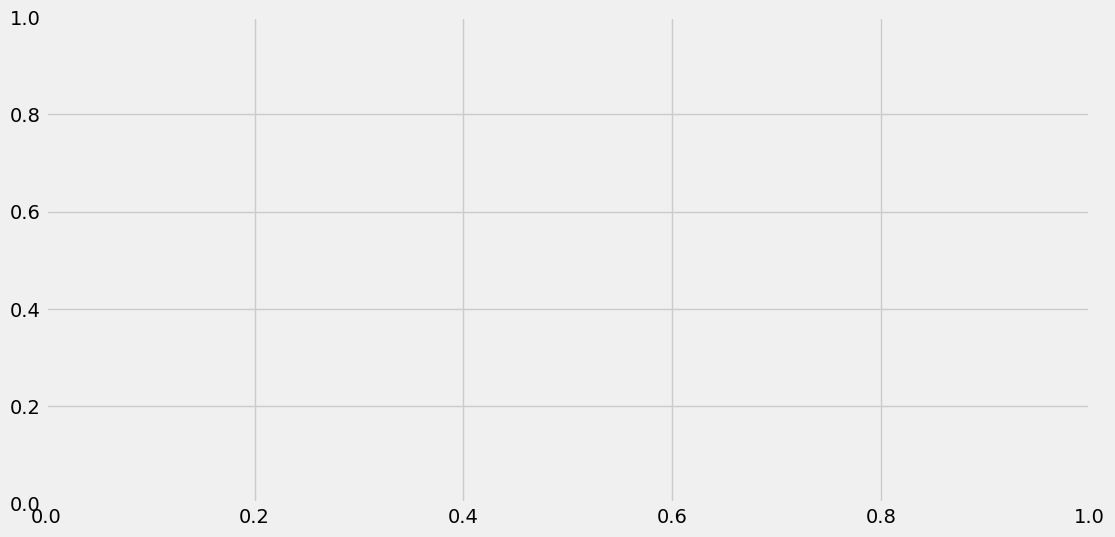

In [295]:
## mean and sd by sex
grouped_data = litob_combined.groupby('Label')[features].agg(['mean', 'std'])

## plots
plt.figure(figsize=(12, 6))
x = range(len(features))
width = 0.35
for i, sex in enumerate([0, 1]):  ## iterate through male and female

    ## multiIndex column names -> accessing colnames
    means = grouped_data.loc[sex, [('Length', 'mean'), ('Width', 'mean'), ('Height', 'mean'), ('Rib count', 'mean'), ('Length (Hinge Line)', 'mean'), ('Distance Umbos', 'mean'), ('LW_ratio', 'mean'), ('LH_ratio', 'mean')]]  # Access 'mean' using MultiIndex column names
    stds = grouped_data.loc[sex, [('Length', 'std'), ('Width', 'std'), ('Height', 'std'), ('Rib count', 'std'), ('Length (Hinge Line)', 'std'), ('Distance Umbos', 'std'), ('LW_ratio', 'std'), ('LH_ratio', 'std')]]  # Access 'std' using MultiIndex column names
    plt.bar([xi + i * width for xi in x], means, width, yerr=stds, label=f"{'Female' if sex == 0 else 'Male'}")

## codenames x-axis labels
codenames = {
    'Length': 'L',
    'Width': 'W',
    'Height': 'H',
    'Rib count': 'RC',
    'Length (Hinge Line)': 'LHL',
    'Distance Umbos': 'DU',
    'LW_ratio': 'LW',
    'LH_ratio': 'LH'
}
plt.xticks([xi + width / 2 for xi in x], [codenames[feature] for feature in features], rotation=45, ha="right")

plt.ylabel("Value")
plt.title("Mean ± SD of Features by Sex")
plt.legend()
plt.tight_layout()
plt.show()
